In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [13]:
sns.set_style('darkgrid')
#plt.rcParams['figure.figsize'] = (13,9)
plt.rcParams['font.size'] = 20
warnings.filterwarnings('ignore')

In [28]:
binary_data = pd.read_csv('c:\\Users\\arinj\\OneDrive\\Desktop\\fault_prediction\\detect_dataset.csv')
multi_data = pd.read_csv('c:\\Users\\arinj\\OneDrive\\Desktop\\fault_prediction\\classData.csv')

In [4]:
binary_data.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,NaN,NaN
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,NaN,NaN
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,NaN,NaN
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,NaN,NaN
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,NaN,NaN


In [9]:
#binary_data=binary_data.drop(['Unnamed: 7', 'Unnamed: 8'], axis=1, inplace=False)
binary_data

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050
...,...,...,...,...,...,...,...
11996,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
11997,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
11998,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
11999,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


In [29]:
multi_data.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


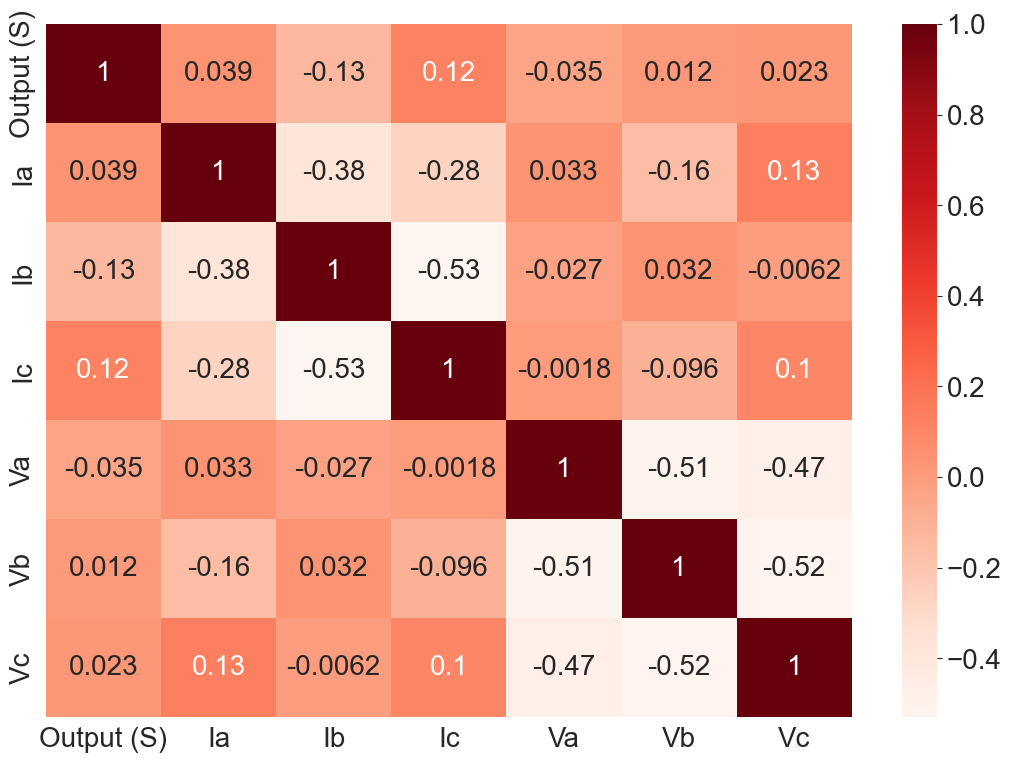

In [16]:
# Binary classification
sns.heatmap(binary_data.corr(), annot=True, cmap='Reds')
plt.show()

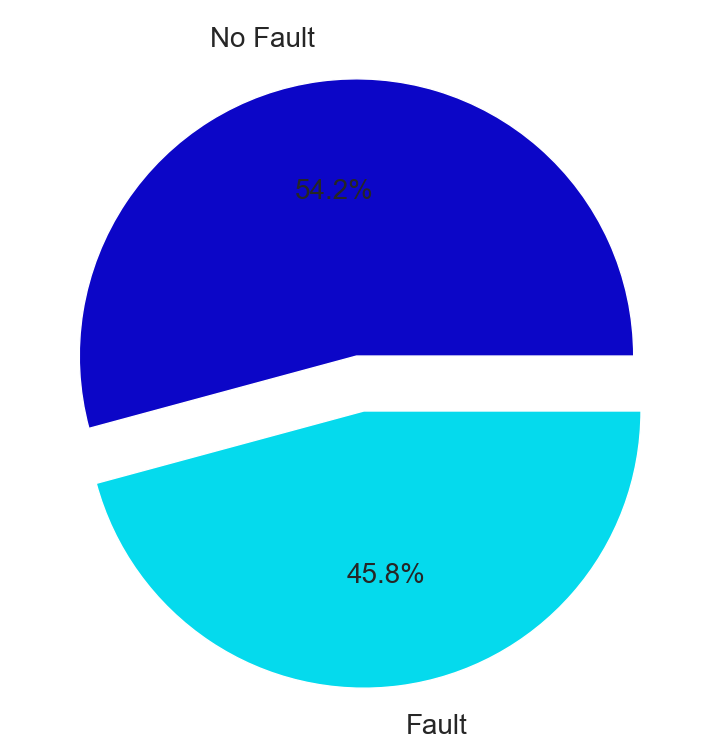

In [17]:
plt.pie(x=binary_data['Output (S)'].value_counts(), labels=['No Fault', 'Fault'],explode = [0, 0.2], autopct= '%1.1f%%', labeldistance=1.15,
       colors=['#0c06c7', '#05daed'])
plt.show()

In [18]:
def dist(cola,colb):
    
    fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(18,10))
    
    sns.distplot(binary_data[cola], label='Line Current', hist=True, color='#fc0328', ax=axs[0])
    sns.distplot(binary_data[colb], label='Line Voltage', hist=True, color='#0c06c7', ax=axs[1])
    
    axs[0].legend(loc='upper right', prop={'size': 12})
    axs[1].legend(loc='upper right', prop={'size': 12})
    
    plt.show()

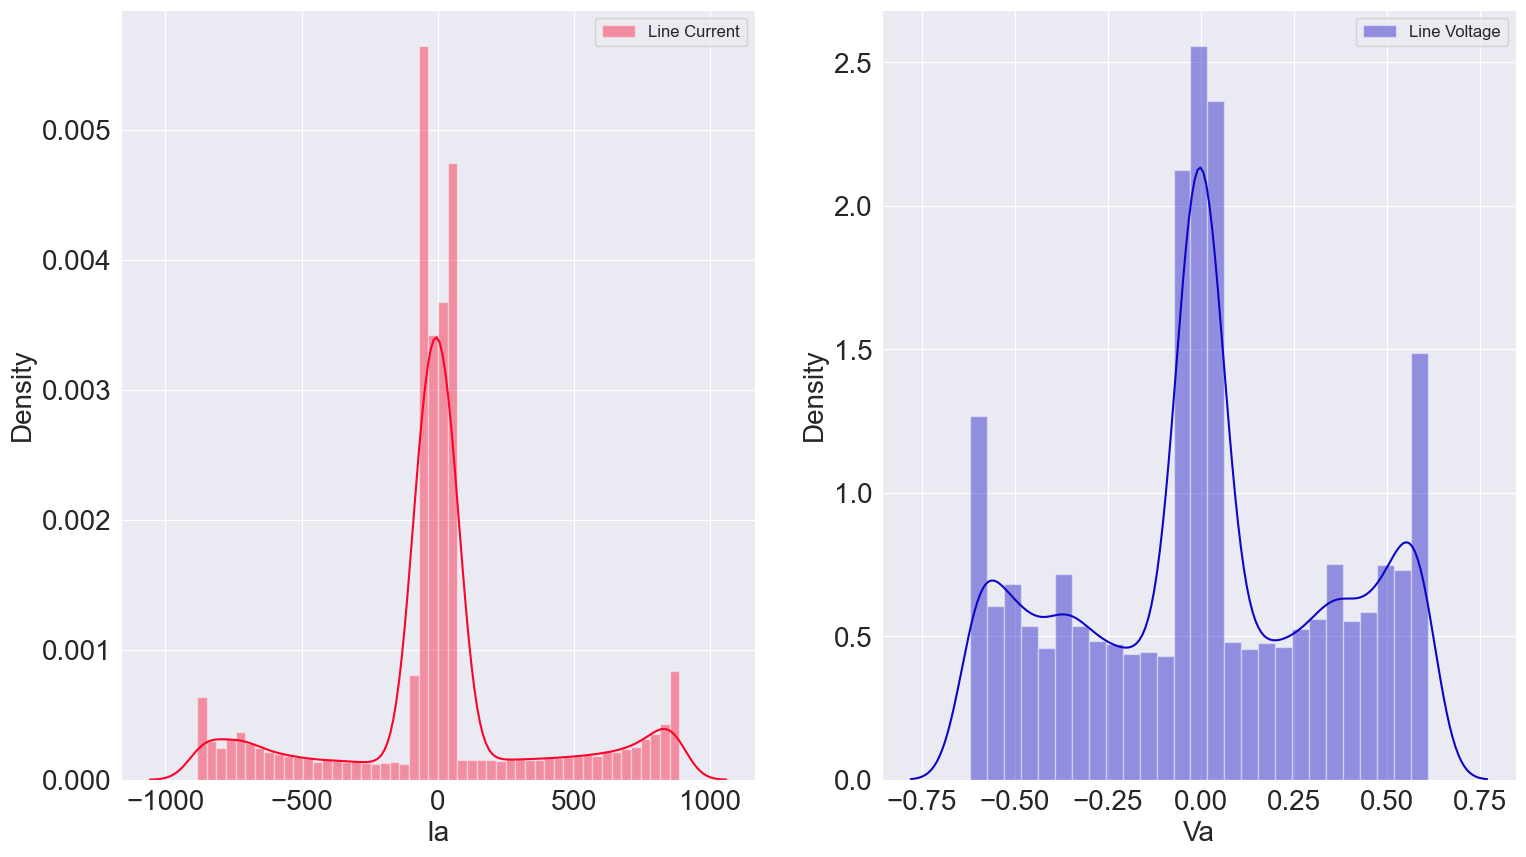

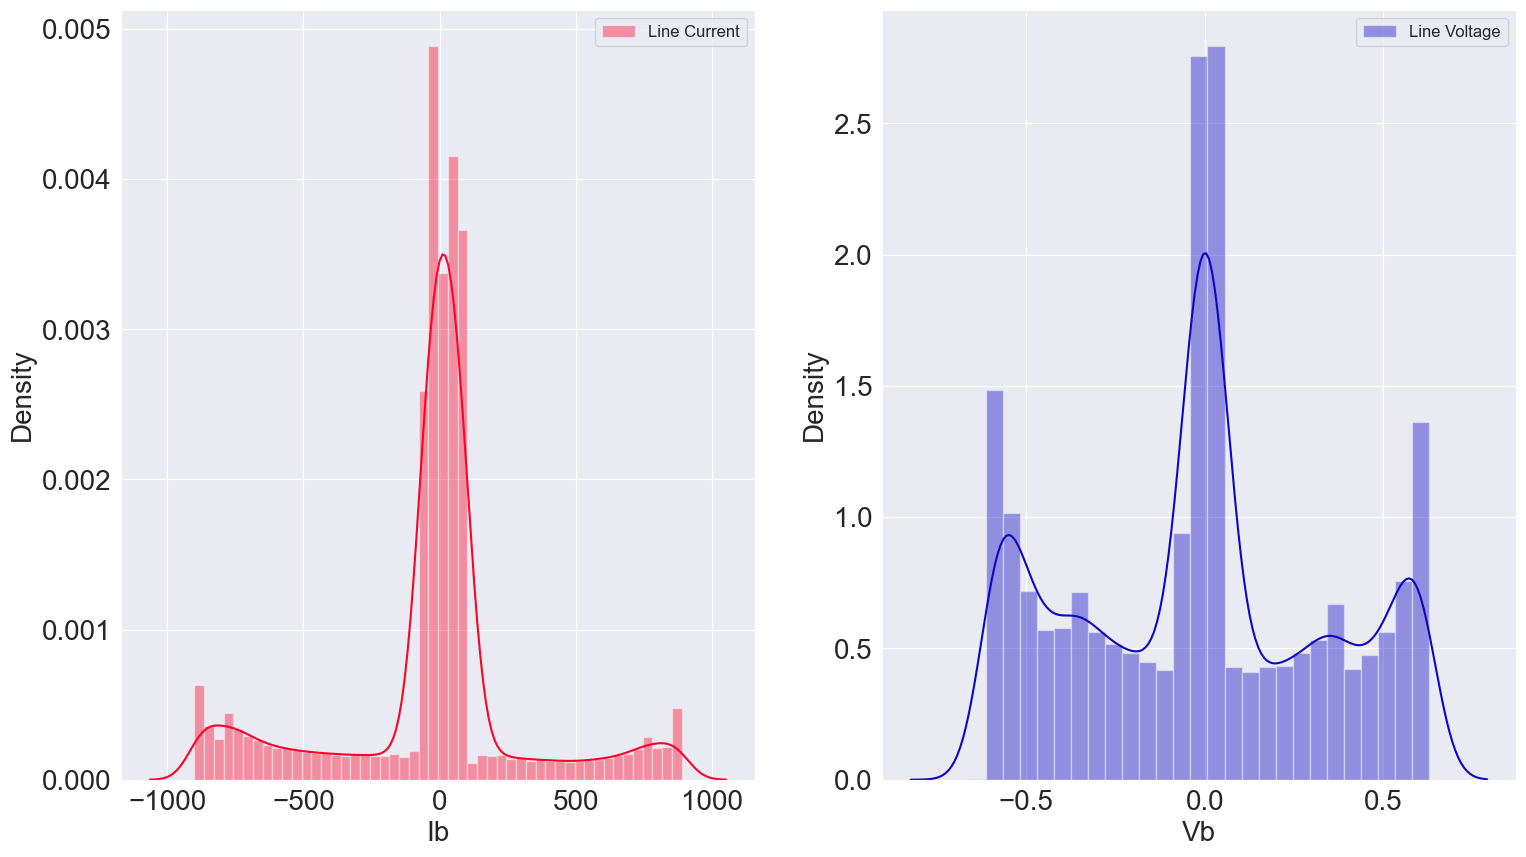

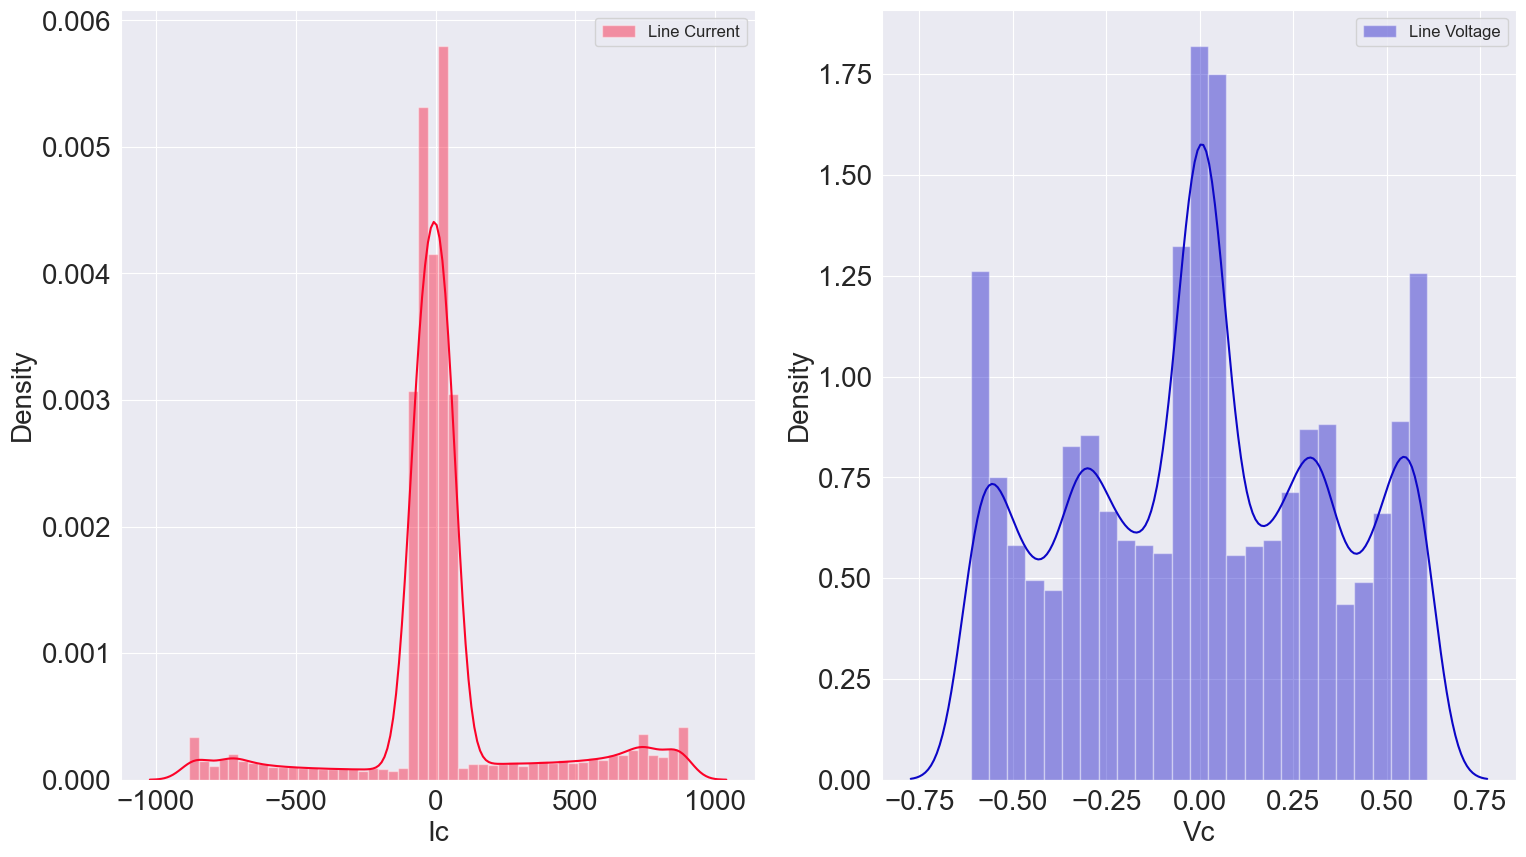

In [19]:
lines = [
    ('Ia', 'Va'),
    ('Ib', 'Vb'),
    ('Ic', 'Vc')
]

for cola,colb in lines:
    dist(cola,colb)
    print('\n')

In [22]:
y = binary_data.iloc[:,0] # target column
X = binary_data.iloc[:,1:7] # feature column

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9600, 6), (2401, 6), (9600,), (2401,))

In [23]:
model_1 = RandomForestClassifier()
model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)

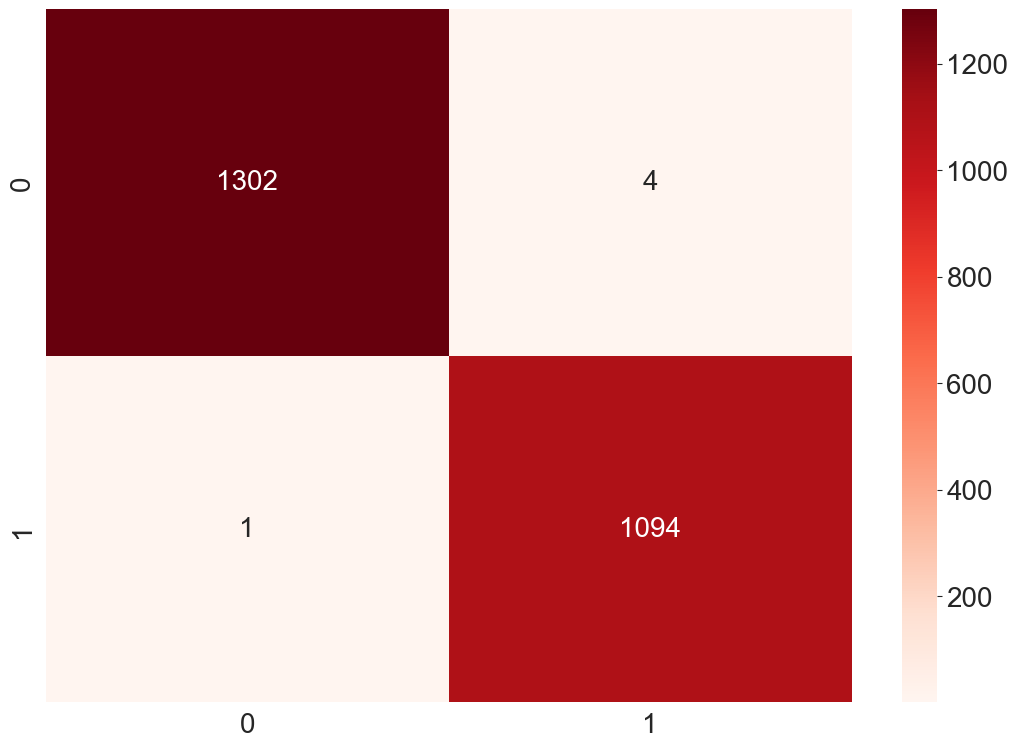

In [25]:
# confusio matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Reds', fmt='.4g')
plt.show()

In [26]:
print(f'Accuracy score: {accuracy_score(y_test,y_pred)*100:.03f}')
print(f'Precision score: {precision_score(y_test,y_pred)*100:.03f}')
print(f'Recall score: {recall_score(y_test,y_pred)*100:.03f}')

Accuracy score: 99.792
Precision score: 99.636
Recall score: 99.909


In [27]:
print(f'Classification report:\n{classification_report(y_test, y_pred)}')

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1306
           1       1.00      1.00      1.00      1095

    accuracy                           1.00      2401
   macro avg       1.00      1.00      1.00      2401
weighted avg       1.00      1.00      1.00      2401



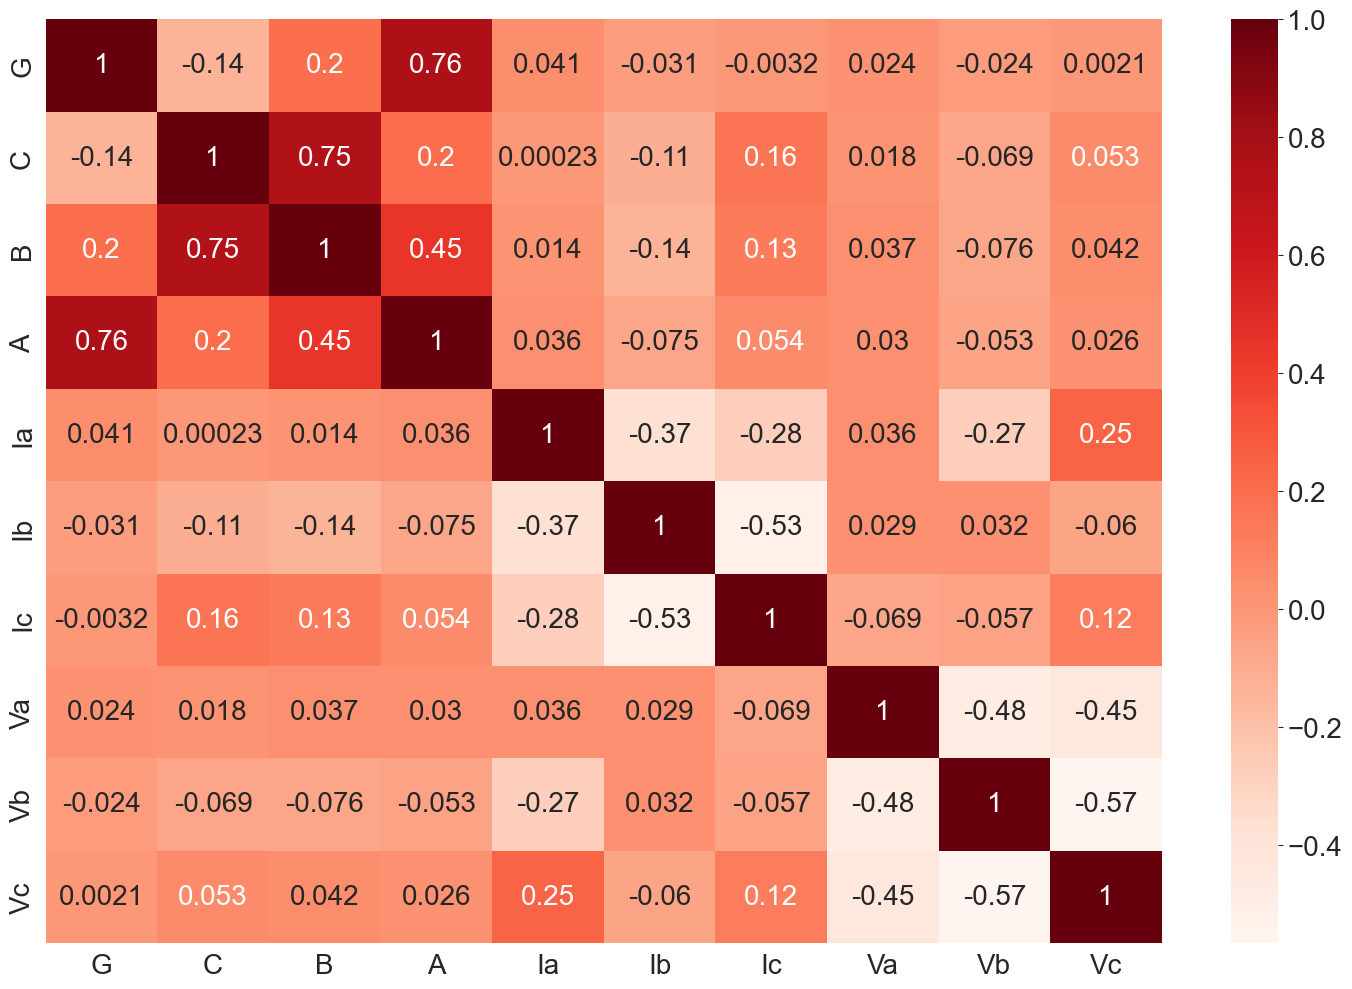

In [30]:
# Multiclass Classification
plt.figure(figsize=(18,12))
sns.heatmap(multi_data.corr(), annot=True, cmap='Reds')
plt.show()

In [31]:
def dist(cola,colb):
    
    fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(18,10))
    
    sns.distplot(multi_data[cola], label='Line Current', hist=True, color='#fc0328', ax=axs[0])
    sns.distplot(multi_data[colb], label='Line Voltage', hist=True, color='#0c06c7', ax=axs[1])
    
    axs[0].legend(loc='upper right', prop={'size': 12})
    axs[1].legend(loc='upper right', prop={'size': 12})
    
    plt.show()

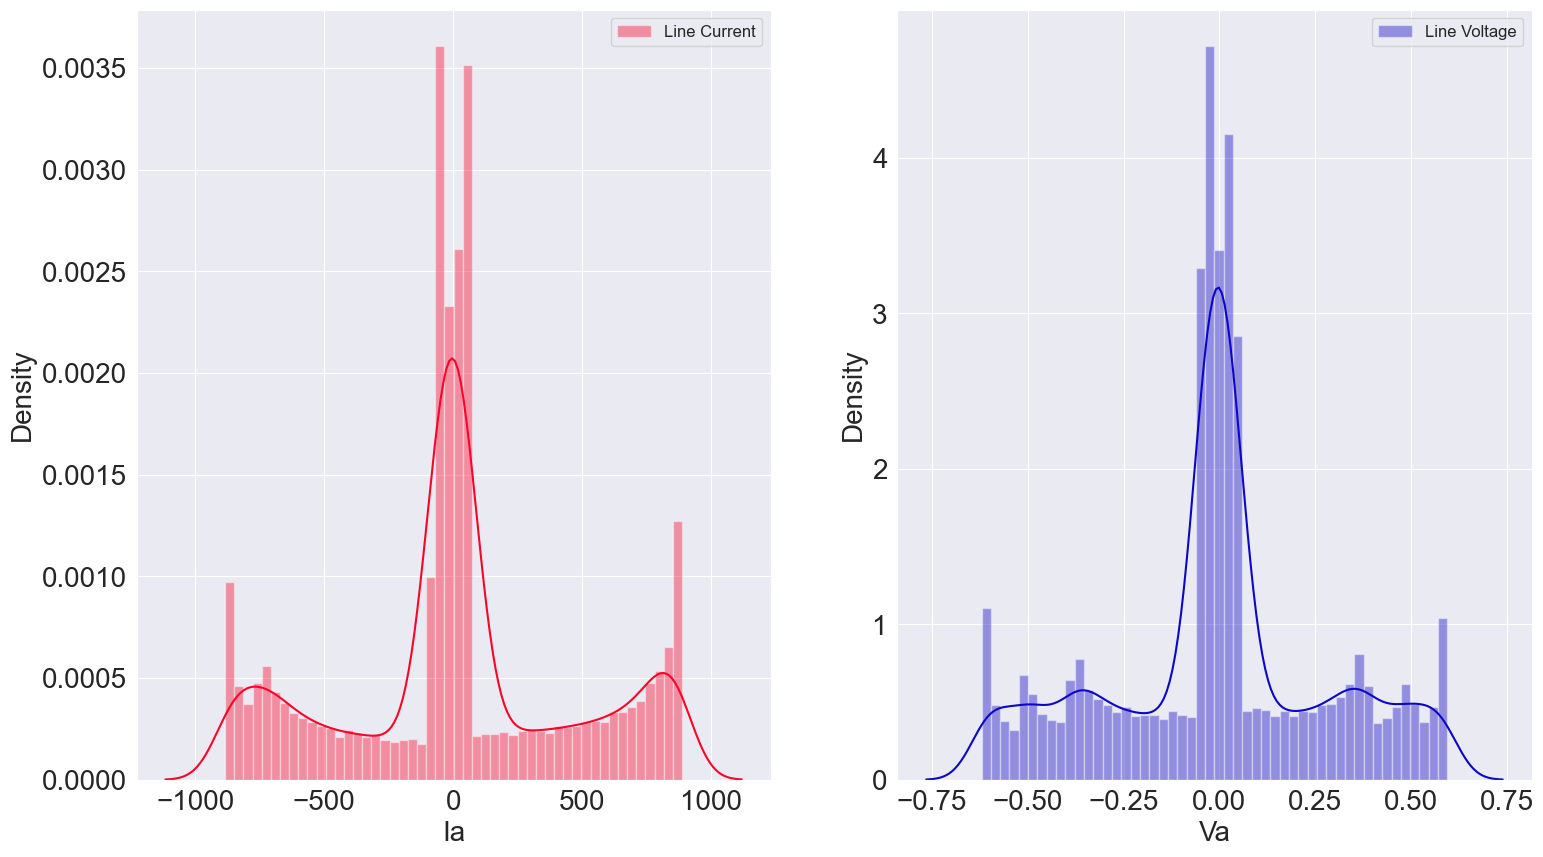

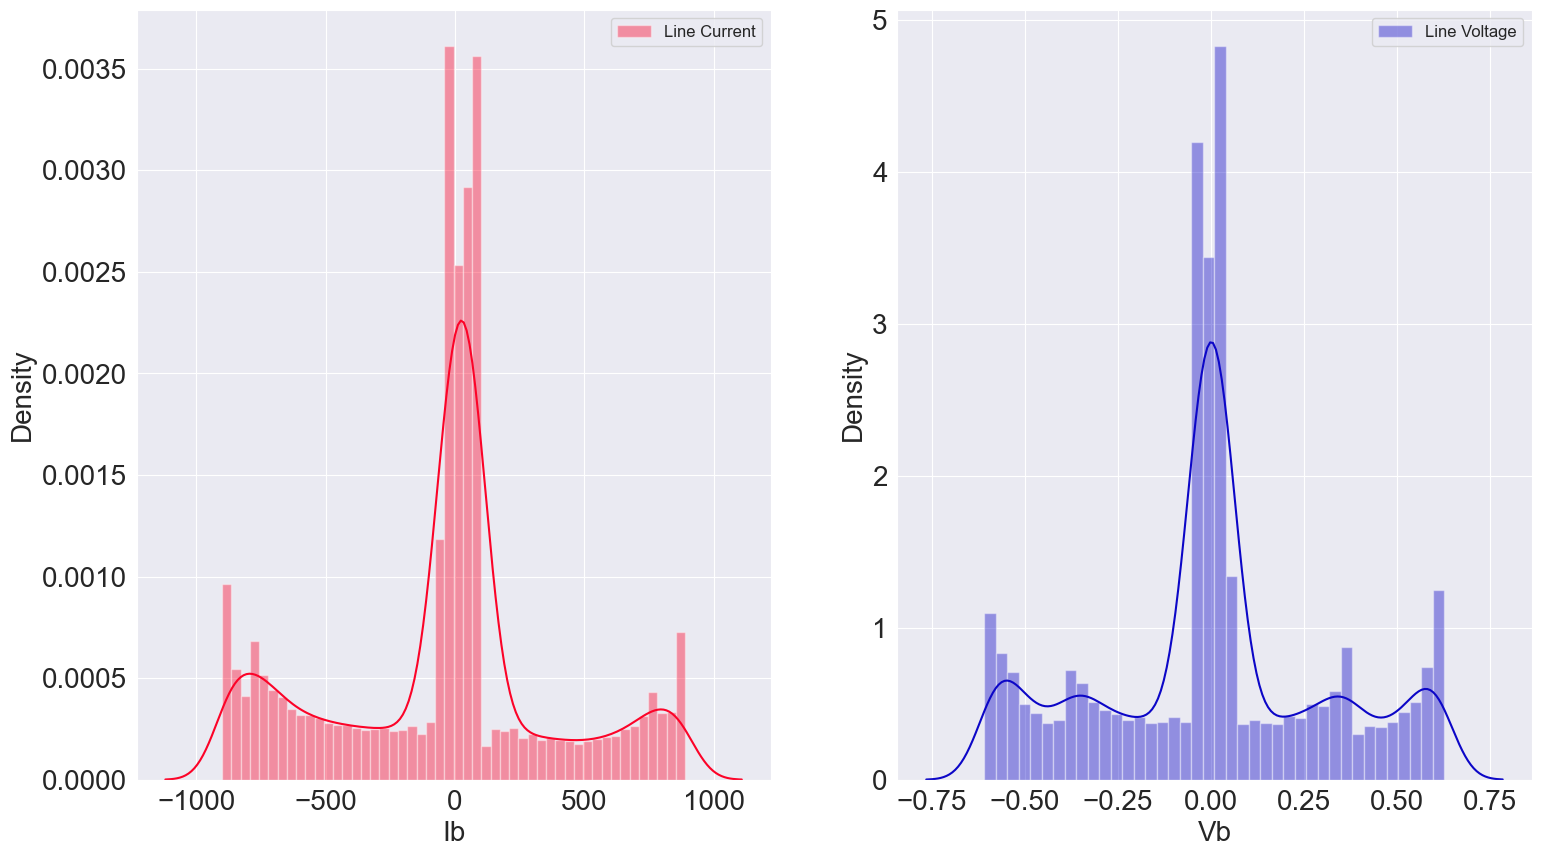

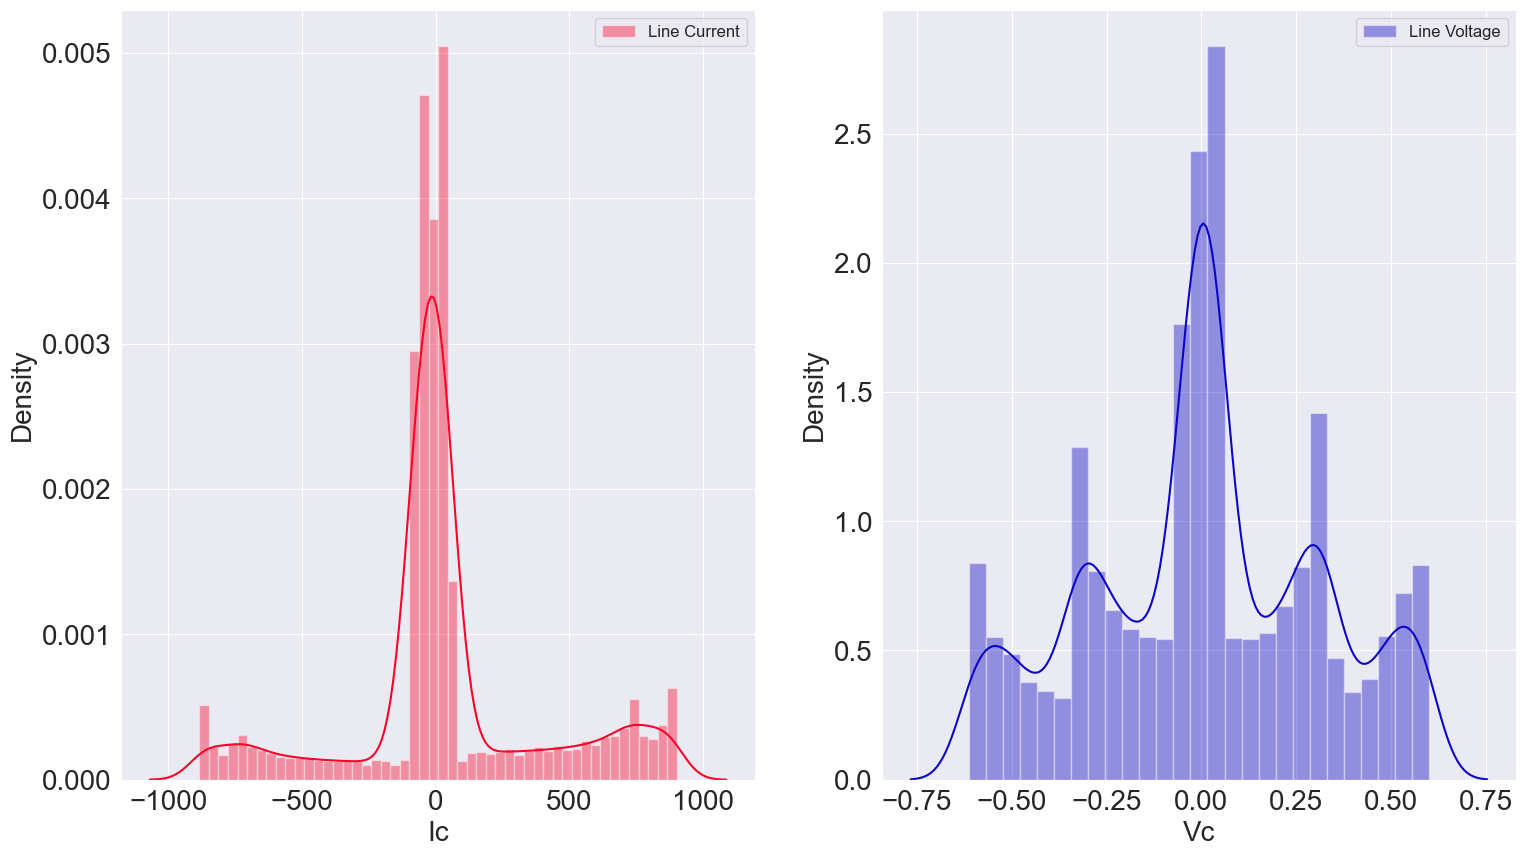

In [32]:
for cola, colb in lines:
    dist(cola,colb)
    print('\n')

In [33]:
multi_data['faultType'] = multi_data['G'].astype(str)+multi_data['C'].astype(str)+multi_data['B'].astype(str)+multi_data['A'].astype(str)
multi_data.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,faultType
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001


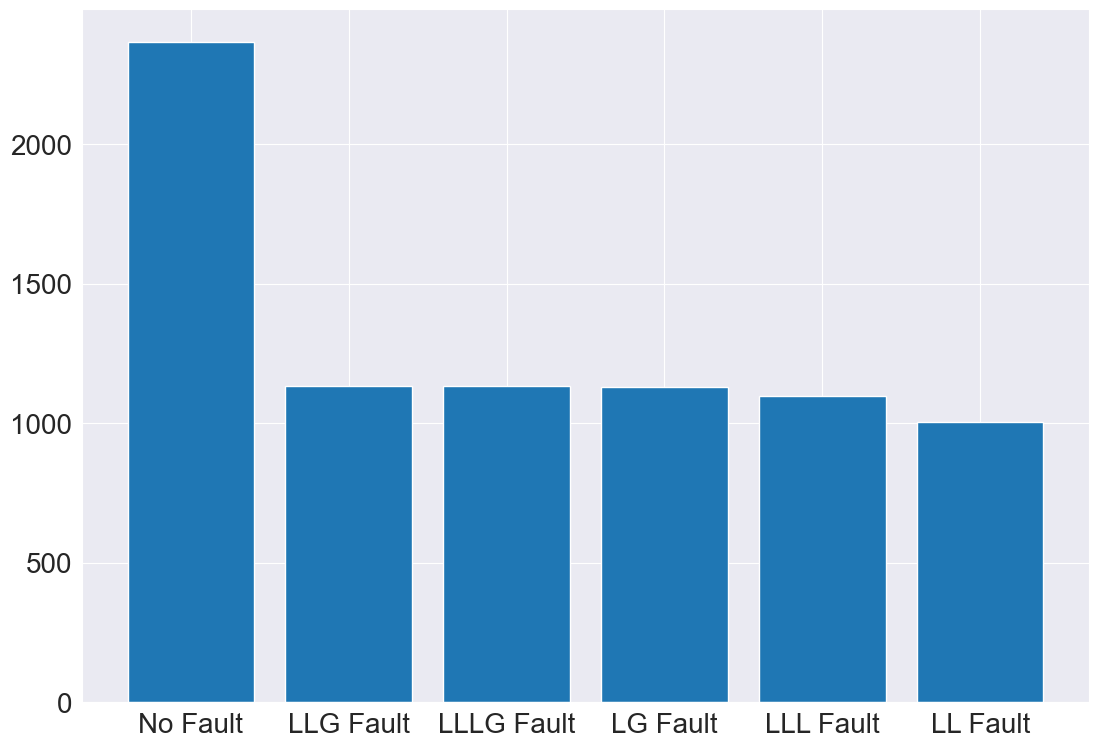

In [37]:
plt.bar(height=multi_data['faultType'].value_counts(),
       x=['No Fault', 'LLG Fault', 'LLLG Fault', 'LG Fault', 'LLL Fault', 'LL Fault'])
plt.show()

In [38]:
X = multi_data.drop(['G','C','B','A','faultType'], axis=1) # feature matrix
y = multi_data['faultType'] # target column

In [40]:
le = LabelEncoder()
y = le.fit_transform(y)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6288, 6), (1573, 6), (6288,), (1573,))

In [42]:
model_2 = RandomForestClassifier()
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)

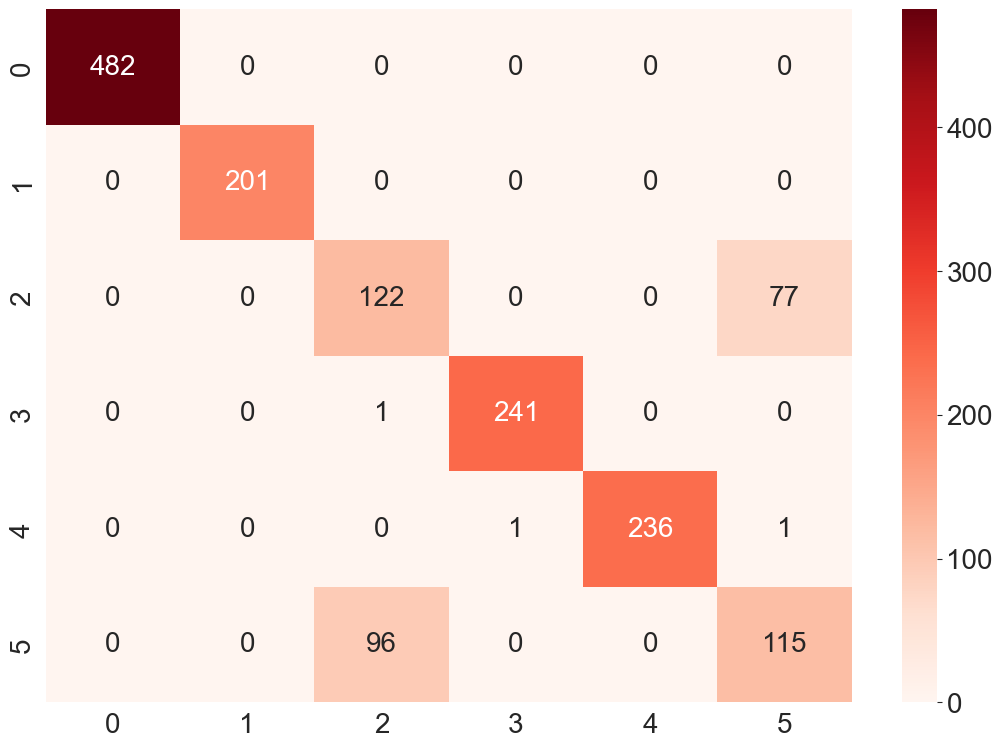

In [44]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Reds', fmt='.4g')
plt.show()

In [45]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)*100:.03f}%')

Accuracy Score: 88.811%


In [46]:
cr = classification_report(y_test, y_pred, output_dict=True)
cr.keys()

dict_keys(['0', '1', '2', '3', '4', '5', 'accuracy', 'macro avg', 'weighted avg'])

In [48]:
# Class-wise accuracy

f1_scores = {}
for key, val in cr.items():
    if key == 'accuracy':
        break
    class_name = le.inverse_transform([int(key)])[0]
    f1_scores[class_name] = val["f1-score"]
sorted(f1_scores.items(), key=lambda x: x[1], reverse=True)

[(0, 1.0),
 (1, 1.0),
 (3, 0.9958677685950413),
 (4, 0.9957805907172996),
 (2, 0.5837320574162679),
 (5, 0.5693069306930693)]